# **ГОТОВЫЕ ДЛЯ МОДЕЛИ ДАНННЫЕ**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
filename='metro_tr_очищен2.csv'
#names=['area A','perimeter P','compactness','length of ker',
#       'width of ker', 'asymmetry coeff', 'length of ker groove','class']
df=read_csv(filename)#,sep='\t', error_bad_lines=False,names=names)

In [ ]:
df.dtypes

Unnamed: 0               int64
temp                   float64
clouds_all               int64
weather_main             int64
weather_description      int64
month                    int64
hour                     int64
traffic_volume           int64
date_time               object
dtype: object

In [ ]:
df.date_time = pd.to_datetime(df.date_time)

In [ ]:
df.set_index('Unnamed: 0',inplace=True)

# **ПРЕДВАРИТЕЛЬНЫЙ ПРСМОТР ДАННЫХ**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

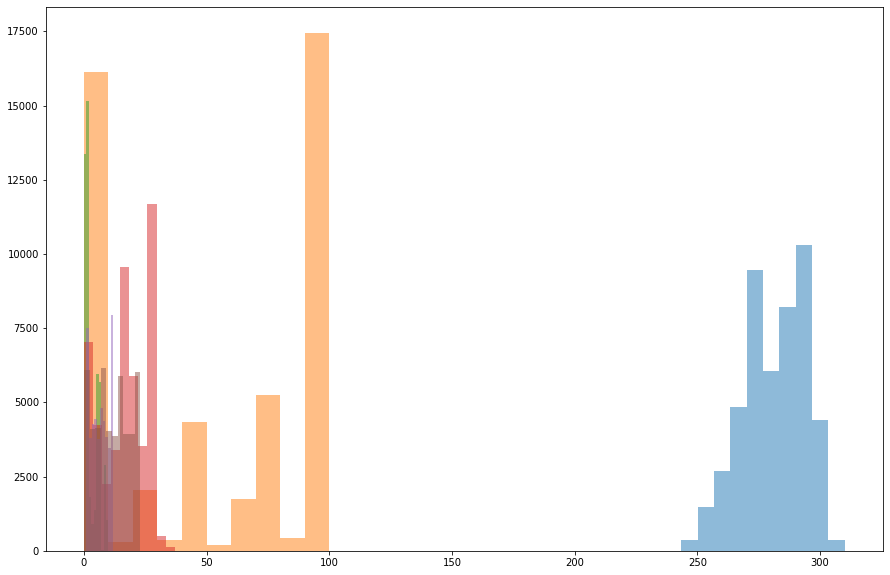

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(df['temp'], alpha = 0.5, label='temp')
plt.hist(df['clouds_all'], alpha = 0.5, label='clouds_all')
plt.hist(df['weather_main'], alpha = 0.5, label='weather_main')
plt.hist(df['weather_description'], alpha = 0.5, label='weather_description')
plt.hist(df['month'], alpha = 0.5, label='month')
plt.hist(df['hour'], alpha = 0.5, label='hour')

plt.show()

In [ ]:
df.head(4)

,temp,clouds_all,weather_main,weather_description,month,hour,traffic_volume,date_time
Unnamed: 0,,,,,,,,
0,288.28,40,1,24,10,9,5545,2012-10-02 09:00:00
1,289.36,75,1,2,10,10,4516,2012-10-02 10:00:00
2,289.58,90,1,19,10,11,4767,2012-10-02 11:00:00
3,290.13,90,1,19,10,12,5026,2012-10-02 12:00:00


In [ ]:
X = df.iloc[:,:6].values
X

array([[288.28,  40.  ,   1.  ,  24.  ,  10.  ,   9.  ],
       [289.36,  75.  ,   1.  ,   2.  ,  10.  ,  10.  ],
       [289.58,  90.  ,   1.  ,  19.  ,  10.  ,  11.  ],
       ...,
       [282.73,  90.  ,  10.  ,  21.  ,   9.  ,  21.  ],
       [282.09,  90.  ,   1.  ,  19.  ,   9.  ,  22.  ],
       [282.12,  90.  ,   1.  ,  19.  ,   9.  ,  23.  ]])

In [ ]:
Y = df.iloc[:,6].values
Y

array([5545, 4516, 4767, ..., 2159, 1450,  954])

**масштабирование:**

In [ ]:
from pandas.core.apply import FrameApply
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
rescaledX=scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
set_printoptions(precision=3)

In [ ]:
rescaledX

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler().fit(X) # создаем объект и обучаем

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX

array([[ 0.552, -0.24 , -0.567,  0.832,  1.027, -0.346],
       [ 0.637,  0.657, -0.567, -1.621,  1.027, -0.202],
       [ 0.654,  1.041, -0.567,  0.274,  1.027, -0.058],
       ...,
       [ 0.115,  1.041,  2.665,  0.497,  0.733,  1.383],
       [ 0.065,  1.041, -0.567,  0.274,  0.733,  1.527],
       [ 0.067,  1.041, -0.567,  0.274,  0.733,  1.671]])

In [ ]:
import pandas as pd
fg = pd.DataFrame(rescaledX, columns=('temp','clouds_all','weather_main','weather_description','month','hour'))
fg.head(15)

,temp,clouds_all,weather_main,weather_description,month,hour
0,0.552013,-0.240240,-0.567089,0.831873,1.027398,-0.345732
1,0.636989,0.656899,-0.567089,-1.620834,1.027398,-0.201645
2,0.654299,1.041387,-0.567089,0.274439,1.027398,-0.057558
3,0.697574,1.041387,-0.567089,0.274439,1.027398,0.086529
4,0.777042,0.656899,-0.567089,-1.620834,1.027398,0.230616
5,0.822677,-1.239909,-0.926254,1.166333,1.027398,0.374703
6,0.936766,-1.239909,-0.926254,1.166333,1.027398,0.518789
7,0.991056,-1.239909,-0.926254,1.166333,1.027398,0.662876
8,1.013087,-0.752891,-0.567089,-1.397861,1.027398,0.806963
9,0.931258,-0.752891,-0.567089,-1.397861,1.027398,0.951050


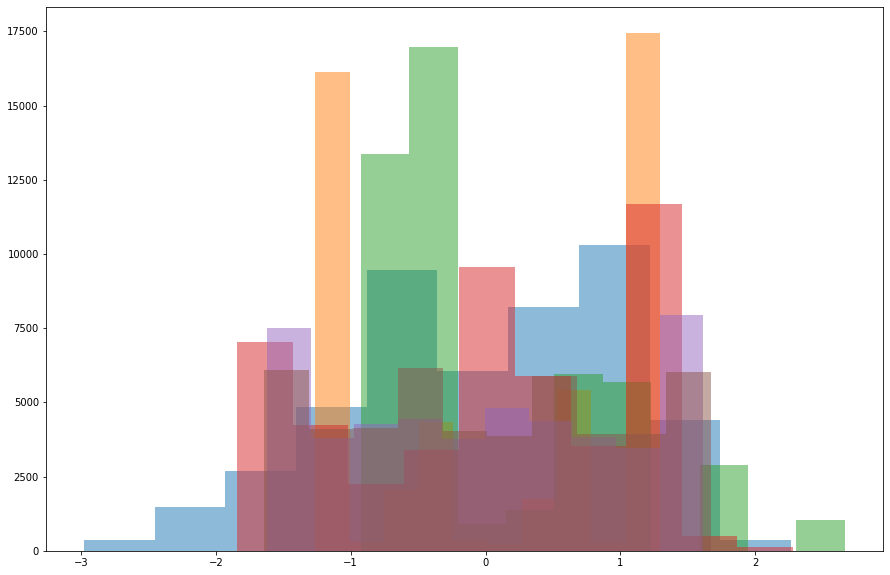

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(fg['temp'], alpha = 0.5, label='temp')
plt.hist(fg['clouds_all'], alpha = 0.5, label='clouds_all')
plt.hist(fg['weather_main'], alpha = 0.5, label='weather_main')
plt.hist(fg['weather_description'], alpha = 0.5, label='weather_description')
plt.hist(fg['month'], alpha = 0.5, label='month')
plt.hist(fg['hour'], alpha = 0.5, label='hour')

plt.show()

# **КРАСОТА!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

In [ ]:
import numpy as np

**цикл который меняет выбросы (значения превышающие 3 стандартных отклонения) на NaN во всех столбцах:**

In [ ]:
for i in fg:
    fg[i] = np.where((fg[i] > 3) | (fg[i] < -3), np.nan, fg[i])
fg.head(15)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,NaN,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,NaN,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,NaN,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,NaN,-0.724455,1.766346


In [ ]:
fgY = pd.DataFrame(Y)
fgY.head(5)

,0
0,5545
1,4516
2,4767
3,5026
4,4918


In [ ]:
fg['end'] = Y

In [ ]:
fg.head(5)

,temp,clouds_all,weather_main,weather_description,month,hour,end
0,0.552013,-0.240240,-0.567089,0.831873,1.027398,-0.345732,5545
1,0.636989,0.656899,-0.567089,-1.620834,1.027398,-0.201645,4516
2,0.654299,1.041387,-0.567089,0.274439,1.027398,-0.057558,4767
3,0.697574,1.041387,-0.567089,0.274439,1.027398,0.086529,5026
4,0.777042,0.656899,-0.567089,-1.620834,1.027398,0.230616,4918


In [ ]:
fg.iloc[:,:6] = fg.iloc[:,:6].round(2)

In [ ]:
fg.head(5)

,temp,clouds_all,weather_main,weather_description,month,hour,end
0,0.55,-0.24,-0.57,0.83,1.03,-0.35,5545
1,0.64,0.66,-0.57,-1.62,1.03,-0.20,4516
2,0.65,1.04,-0.57,0.27,1.03,-0.06,4767
3,0.70,1.04,-0.57,0.27,1.03,0.09,5026
4,0.78,0.66,-0.57,-1.62,1.03,0.23,4918


In [ ]:
fg_groupby.isna().sum()

In [ ]:
fg = fg.sort_values(by=['end',3]) # упорядочиваем данные по результирующим признакаам

In [ ]:
fg_groupby['end'].value_counts()

0.0    500
1.0    268
Name: end, dtype: int64

In [ ]:
fg_groupby.head(20)

,0,1,2,3,4,5,6,7,end
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0.0
7,1.827813,-0.184482,NaN,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0.0
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760,0.0
12,1.827813,0.566649,0.563223,-1.288212,-0.692891,-0.620962,2.926869,2.021610,0.0
21,1.233880,-0.685236,0.770014,-1.288212,-0.692891,0.432467,-0.253316,1.425995,0.0
29,0.342981,-0.121888,1.183596,-1.288212,-0.692891,0.267472,-0.407342,0.404942,0.0
33,0.639947,-0.904316,1.183596,-1.288212,-0.692891,-1.534781,-0.857340,-0.445935,0.0
36,2.124780,0.535352,0.356432,-1.288212,-0.692891,0.153245,-0.156673,0.149679,0.0
41,0.936914,0.378867,0.770014,-1.288212,-0.692891,1.041680,0.676880,0.319855,0.0
44,0.936914,1.192592,-0.263941,-1.288212,-0.692891,-0.582887,-0.537208,0.575118,0.0


In [ ]:
fg_groupby = fg_groupby.fillna(method ='pad') # заменяем NaN на предыдущее значение в столбце
# методы Значение параметра метода: {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None
#pad/ffill: использование предыдущий Не пропущенное значение, чтобы заполнить пропущенное значение
#backfill/bfill: использование следующий Заполните пропущенное значение не пропущенным значением
#None: Укажите значение для замены отсутствующего значения (по умолчанию это так)

In [ ]:
fg_groupby.head(20)

NameError: ignored

In [ ]:
fg.to_csv('metro_tr_очищен3.csv')